##NO. 1

In [2]:
import numpy as np

In [3]:
pesan = [16,18,5,16,1,18,5,0,20,15,0,14,5,7,15,20,8,1,20,5]
pesan = np.array(pesan)

In [5]:
len(pesan)

20

In [7]:
matriks_pesan1 = np.reshape(pesan, (4,5))
matriks_pesan1

array([[16, 18,  5, 16,  1],
       [18,  5,  0, 20, 15],
       [ 0, 14,  5,  7, 15],
       [20,  8,  1, 20,  5]])

In [9]:
matriks_pesan2 = np.reshape(pesan,(5,4))
matriks_pesan2

array([[16, 18,  5, 16],
       [ 1, 18,  5,  0],
       [20, 15,  0, 14],
       [ 5,  7, 15, 20],
       [ 8,  1, 20,  5]])

In [10]:
matriks_encoder = np.array([
                            [2,1,0,4],[3,4,2,1],
                            [1,1,9,0],[0,7,8,3]
])
matriks_encoder

array([[2, 1, 0, 4],
       [3, 4, 2, 1],
       [1, 1, 9, 0],
       [0, 7, 8, 3]])

###Hasil Encoding

In [11]:
matriks_transmisi1 = matriks_encoder @ matriks_pesan1
matriks_transmisi1

array([[130,  73,  14, 132,  37],
       [140, 110,  26, 162,  98],
       [ 34, 149,  50,  99, 151],
       [186, 171,  43, 256, 240]])

In [12]:
matriks_transmisi2 =  matriks_pesan2 @ matriks_encoder 
matriks_transmisi2

array([[ 91, 205, 209, 130],
       [ 61,  78,  81,  22],
       [ 85, 178, 142, 137],
       [ 46, 188, 309,  87],
       [ 39,  67, 222,  48]])

###Decode

In [13]:
encoder_inv = np.linalg.inv(matriks_encoder) #Matriks Inverse


In [15]:
#Decode
decoded1 = encoder_inv@matriks_transmisi1
decoded1

array([[ 1.60000000e+01,  1.80000000e+01,  5.00000000e+00,
         1.60000000e+01,  1.00000000e+00],
       [ 1.80000000e+01,  5.00000000e+00, -5.41233725e-16,
         2.00000000e+01,  1.50000000e+01],
       [-3.98986399e-17,  1.40000000e+01,  5.00000000e+00,
         7.00000000e+00,  1.50000000e+01],
       [ 2.00000000e+01,  8.00000000e+00,  1.00000000e+00,
         2.00000000e+01,  5.00000000e+00]])

In [16]:
decoded2 = matriks_transmisi2@encoder_inv
decoded2

array([[ 1.60000000e+01,  1.80000000e+01,  5.00000000e+00,
         1.60000000e+01],
       [ 1.00000000e+00,  1.80000000e+01,  5.00000000e+00,
        -2.08166817e-16],
       [ 2.00000000e+01,  1.50000000e+01,  1.57859836e-15,
         1.40000000e+01],
       [ 5.00000000e+00,  7.00000000e+00,  1.50000000e+01,
         2.00000000e+01],
       [ 8.00000000e+00,  1.00000000e+00,  2.00000000e+01,
         5.00000000e+00]])

In [17]:
np.allclose(matriks_pesan1, decoded1)

True

In [18]:
np.allclose(decoded2, matriks_pesan2)

True

##Nomor 2

In [19]:
from scipy.integrate import trapz
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/ROC%20Curve%20SVR%20-%20Random%20Forest.csv?token=AEZDEHVS66CKQBUSHKZ534TA44EVO')
df

,Unnamed: 0,svr_fpr,svr_tpr,rfr_fpr,rfr_tpr
0,0,0.000000,0.000000,0.000000,0.000000
1,1,0.000000,0.015152,0.000000,0.030303
2,2,0.004831,0.030303,0.000000,0.060606
3,3,0.009662,0.030303,0.000000,0.106061
4,4,0.012077,0.045455,0.002415,0.121212
...,...,...,...,...,...
61,61,0.973430,0.969697,0.449275,0.984848
62,62,0.973430,0.969697,0.507246,0.984848
63,63,0.992754,1.000000,0.582126,0.984848
64,64,0.997585,1.000000,0.722222,1.000000


In [21]:
y_svr = df['svr_tpr']
x_svr = df['svr_fpr']
y_rfr = df['rfr_tpr']
x_rfr = df['rfr_fpr']

Text(0.5, 1.0, 'Random Forest Model')

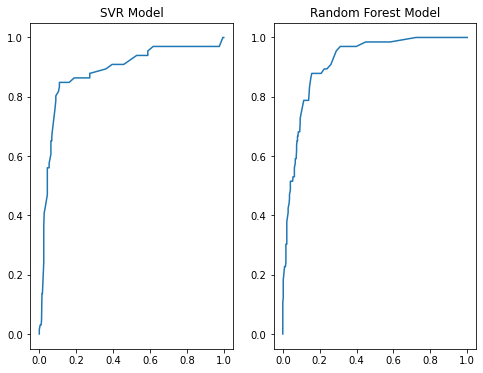

In [23]:
#Plot

fig, axs = plt.subplots(ncols = 2, figsize=(8,6))
axs[0].plot(x_svr, y_svr)
axs[0].set_title('SVR Model')
axs[1].plot(x_rfr, y_rfr)
axs[1].set_title('Random Forest Model')

In [24]:
trapz(y_svr, x_svr)

0.8817889035280342

In [25]:
trapz(y_rfr, x_rfr)

0.9160262040696824